In [5]:
import time
import string
import numpy as np
import itertools
import os, random

def print_league(L,n=0):
    if n == 0:
        n = len(L)
    c = 0
    for i in L:
        if c == n:
            break
        c += 1
        print('\nCampionato {}:'.format(c))
        for j in i:
            print(j)
            
def check_unique_team(L):
    #flatten L and convert to string
    L_string = [item for sublist in L for item in sublist]
    if len(L_string) == len(set(L_string)):
        return True
    else:
        return False
        
def combinations_noteams(iterable, r):
    for matches in itertools.combinations(iterable, int(r)):
        #print(matches)
        if check_unique_team(matches):
            yield matches

def get_compatible_lists(giornata,giornate_list):
    gi = []
    for j in giornate_list:
        gg = []
        gg.append(giornata)
        gg.append(j)
        if len(set(flatten_list(gg))) == n_teams:
            gi.append(j)
    return gi

def flatten_list(L): return [item for sublist in L for item in sublist]

def create_teams_matches_days(n_teams):

    teams = [i for i in string.ascii_lowercase[0:n_teams]]

    matches_iter = itertools.combinations(teams,2)
    matches = [i for i in matches_iter]
    
    days_iter = combinations_noteams(matches, n_teams/2)

    days = [i for i in days_iter]

    return teams,matches,days

def create_league(glist):
    
    L = []
    L_all = []
    
    def create_league_subf(L,glist, txt):

        for i in glist:
            L1 = L.copy()
            L1.append(i)
            
            if len(L1) == n_teams - 1:
                txt.write('%s\n' % ''.join(flatten_list(flatten_list(flatten_list(L1)))))
                
            else:
                s1 = get_compatible_lists(i,glist)
                create_league_subf(L1,s1, txt)
            
    create_league_subf(L,glist, txt)
#    return txt2

#==============================================================================
# os.remove('leagues_4_teams_lines.txt')
# 
# n_teams = 4
# 
# teams,matches,days = create_teams_matches_days(n_teams)
# 
# start_time = time.time()
# txt = open('leagues_4_teams_lines.txt', 'a+')
# leagues = create_league(days)
# txt.close()
# 
# 
# print("--- %s seconds ---" % (time.time() - start_time))
# print(len(matches))
# print(len(days))
#==============================================================================
#print(len(leagues))
#print_league(leagues,1) # print first 3 leagues

#teams = ['A', 'B', 'C', 'D']



def organize_round(line):
    days = []
    girone = []
    list_line = [i for i in line[:-1]]
    while len(girone) < len(teams) - 1:
        while len(days) < len(teams) // 2:
            a = list_line[0]
            b = list_line[1]
            days.append((a, b))
            del list_line[:2]
        girone.append(days)
        days = []
    return girone
    
def gen_cal(days, girone):
    ''' Dal girone creo il calendario con tutte le partite del campionato. La variable
        days rappresenta il numero di giornate. La variabile girone è una lista ed è 
        l'output di all_tourn. L'output è una lista di tuples ed ogni tuples rappresenta
        una partita del torneo, già in ordine secondo il calendario.'''
    

    if days % len(girone) == 0:
        return list(itertools.chain(*(girone * (days // len(girone)))))
    
    else:
        if days == 1:
            return girone[0]
            
        elif days > len(girone):
            temp = list(girone * (days // len(girone)))
            resto = days % len(girone)
            temp.append(list(itertools.chain(*(girone[0 : resto]))))
            temp = list(itertools.chain(*temp))
            return temp
            
        else:
            temp = [i for i in girone[0:days]]
            temp = list(itertools.chain(*temp))
            return temp
            
def classifica(dati):
    '''dati è un dict (disordinato) nel quale ad ogni squadra è associato un tuple di 3 elementi.
       Questi 3 elementi rappresentano nell'ordine: punti, punti totali, gol segnati.
       L'output è unua lista di tuples (ordinata) che rappresenta la classifica finale.'''
       
    classifica_ordinata = sorted(sorted(sorted(dati.items(), key = lambda x : \
                            x[1][2], reverse = True), key = lambda x : x[1][1], \
                            reverse = True), key = lambda x : x[1][0], reverse = True)


    return classifica_ordinata
            
            
def play_league(teams, goals, days, cal):
    letters = [i for i in string.ascii_lowercase[0:len(teams)]]
    alias = {}
    for i in letters:
        alias['{}'.format(i)] = teams[letters.index(i)]
    
    points = {i:0 for i in teams}
              
    dati = {}
              
    value = len(teams) // 2
    
    for i in range(len(cal)):
        match = []
        team1 = alias[cal[i][0]]
        team2 = alias[cal[i][1]]
        match.append(goals[team1][i // value])
        match.append(goals[team2][i // value])
        
        if match[0] > match[1]:
            points[team1] += 3
        elif match[0] < match[1]:
            points[team2] += 3
        else:
            points[team1] += 1
            points[team2] += 1

    for i in points:
        dati[i] = (points[i], punti_totali[i], sum(goals[i]))

#==============================================================================
#     for i in classifica(dati):
#         print(i)
#         
#     print('\n')
#     print(alias)
#==============================================================================
    
    return classifica(dati)

import pandas as pd

def play_all_leagues(teams, goals, days):
    
    vittorie = {i:[0 for j in range(len(teams))] for i in teams}
    all_leagues = open('leagues_%s_teams_lines.txt' % len(teams), 'r')
    counts = 0
    while True:
        league = all_leagues.readline()
        if league != '':
            girone = organize_round(league)
            cal = gen_cal(days, girone)
            temp = play_league(teams, goals, days, cal)
            counts += 1
            for i in range(len(temp)):
                squadra = temp[i][0]
                vittorie[squadra][i] += 1
        else:
            break
        
    all_leagues.close()
        
    print(vittorie)
    print('\n')
    print(counts)
#==============================================================================
#     for i in vittorie:
#        print(str(i) + ' primo: ' + str(round(vittorie[i][5] * 100 / counts, 2)) + ' %')
#==============================================================================
    
#==============================================================================
#     tabella = pd.DataFrame(vittorie)
#     tabella.loc[:] = round(tabella.loc[:]/counts*100,2)
#     print(tabella.head(6))
#==============================================================================
import matplotlib.pylab as plt
def play_all_leagues2(teams, goals, days, trials):
    
    vittorie = {i:[0 for j in range(len(teams))] for i in teams}
    counts = 0
    for i in range(trials):
        league = get_random_line('leagues_%s_teams_lines - Copy.txt' % len(teams))
        if league != '':
            girone = organize_round(league)
            cal = gen_cal(days, girone)
            temp = play_league(teams, goals, days, cal)
            counts += 1
            for i in range(len(temp)):
                squadra = temp[i][0]
                vittorie[squadra][i] += 1
        else:
            break
       
    tabella = pd.DataFrame(vittorie)
    tabella.loc[:] = round(tabella.loc[:]/counts*100,2)
    tabella.index = np.arange(1,len(tabella)+1)
    return tabella
    
#     print(vittorie)
#     print('\n')
#     print(counts)
#==============================================================================
    L = []
    for i in vittorie:
       L.append((round(vittorie[i][0] * 100 / counts, 2)))
       
    plt.plot(L,'mo')
    plt.axis([-1,8,-3,100])    
    plt.show()
    
def get_random_line(file_name):
    total_bytes = os.stat(file_name).st_size 
    random_point = random.randint(0, total_bytes)
    file = open(file_name)
    file.seek(random_point)
    file.readline() # skip this line to clear the partial line
    temp = file.readline()
    file.close()
    return temp
#==============================================================================
# file = open('leagues_6_teams_lines.txt')
# line = file.readline()
# file.close()
# 
# girone = organize_round(line)
# 
# days = 26
# 
# cal = gen_cal(days, girone)
#==============================================================================

teams = ['Ciolle United', 'FC Pastaboy', 'Bucalina FC', 'LA CORRAZZATA POTEMKIN',\
         'Fc Stress', 'FC Roxy', 'FC BOMBAGALLO', 'AC PICCHIA']
         
#teams = ['Ciolle United', 'FC Pastaboy', 'Bucalina FC', 'LA CORRAZZATA POTEMKIN', 'Fc Stress', 'FC Roxy']
         

goals = {'Ciolle United':          [3,1,1,2,1,1,2,0,2,2,4,3,0,1,3,1,3,1,0,2,1,2,2,1,1,2,], \
         'FC Pastaboy':            [1,3,2,2,2,0,0,1,2,1,0,2,1,2,6,5,1,1,3,2,2,6,4,2,0,3,], \
         'Bucalina FC':            [2,3,0,3,1,2,2,1,1,2,3,1,1,1,0,1,1,1,0,2,3,2,2,2,1,2,], \
         'LA CORRAZZATA POTEMKIN': [0,3,3,2,1,0,0,2,2,0,3,2,3,0,0,0,2,1,2,1,3,2,2,1,2,3,], \
         'Fc Stress':              [0,0,2,1,0,0,0,3,0,2,1,1,1,1,2,0,0,3,3,3,2,1,3,2,2,3,], \
         'FC Roxy':                [3,1,1,1,1,1,1,3,3,2,0,2,0,1,2,2,1,2,1,1,0,4,2,2,4,1,], \
         'FC BOMBAGALLO':          [0,2,1,2,0,2,1,1,0,0,0,0,3,0,2,0,2,1,3,3,1,2,1,3,0,1,], \
         'AC PICCHIA':             [2,1,0,2,0,0,2,2,3,1,3,3,4,0,1,1,2,0,1,1,1,1,2,1,0,1,]}
         


punti_totali = {'Ciolle United': 1888, 'FC Pastaboy': 1953.5, 'Bucalina FC': 1871.5, \
               'LA CORRAZZATA POTEMKIN': 1873.5, 'Fc Stress': 1851.5, 'FC Roxy': 1886,\
               'FC BOMBAGALLO': 1812, 'AC PICCHIA': 1838.5}

#a = play_league(teams, goals, days, cal)

start = time.time()
tabella = play_all_leagues2(teams, goals, 26, 1000)
print('\n')
print(time.time() - start)
tabella.head(8)





0.26201510429382324


,AC PICCHIA,Bucalina FC,Ciolle United,FC BOMBAGALLO,FC Pastaboy,FC Roxy,Fc Stress,LA CORRAZZATA POTEMKIN
1,0.0,15.3,14.5,0.0,61.1,7.4,0.8,0.9
2,0.1,16.4,23.8,0.1,24.7,23.3,5.9,5.7
3,1.4,18.4,22.7,0.8,10.1,22.6,10.3,13.7
4,5.6,16.2,15.6,2.4,2.8,19.2,18.2,20.0
5,10.1,12.5,11.4,6.6,0.9,13.5,23.1,21.9
6,17.6,10.4,5.5,15.3,0.4,8.5,22.6,19.7
7,29.6,7.7,4.2,31.6,0.0,3.5,12.7,10.7
8,35.6,3.1,2.3,43.2,0.0,2.0,6.4,7.4


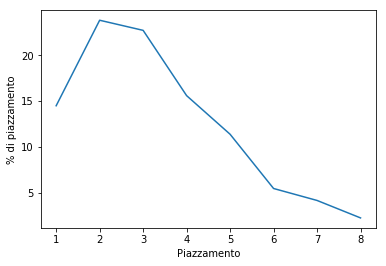

In [10]:

plt.plot(tabella["Ciolle United"])
plt.xlabel("Piazzamento")
plt.ylabel("% di piazzamento")
plt.show()

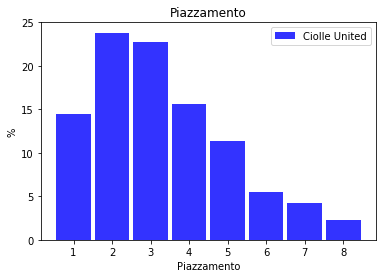

In [15]:

fig, ax = plt.subplots()

index = np.arange(8)+1
bar_width = 0.9

opacity = 0.8

rects1 = plt.bar(index, tabella["Ciolle United"], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ciolle United')



plt.xlabel('Piazzamento')
plt.ylabel('%')
plt.title('Piazzamento')
plt.legend()

#plt.tight_layout()
plt.show()

In [23]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BEB5160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA811D0>]], dtype=object)

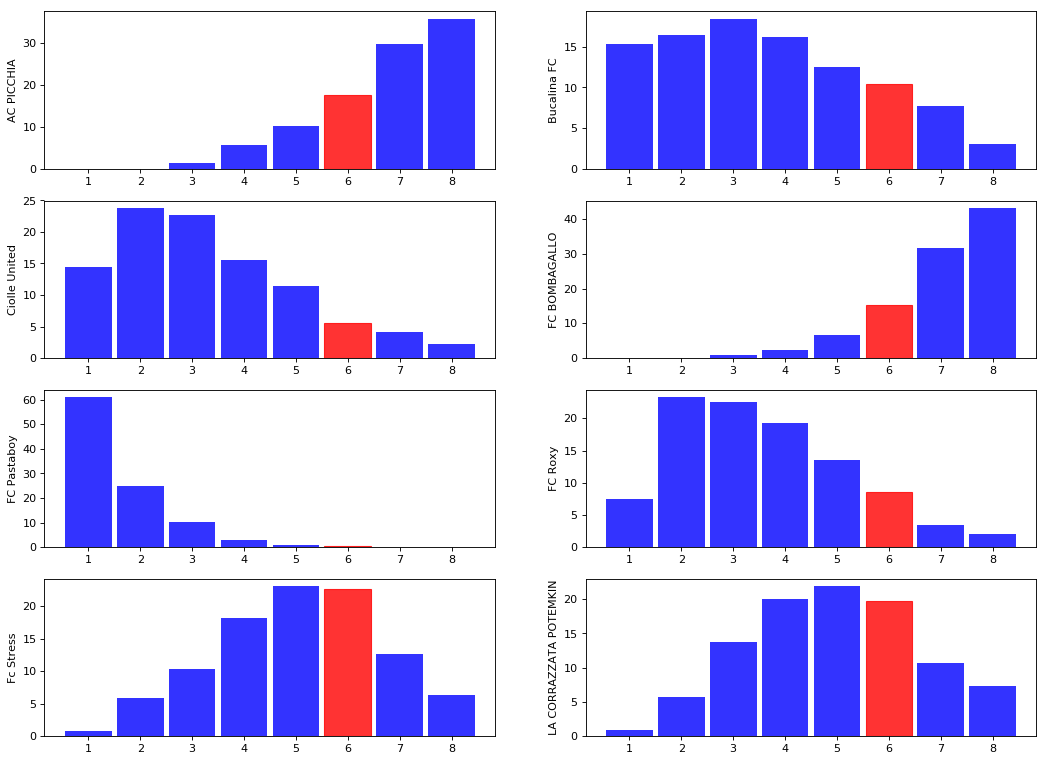

In [48]:
teams = list(tabella)

index = np.arange(8)+1
c = 0
ax = [[] for i in range(len(teams)//2)]
len(ax)

plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
c = 0
for i in range(4):
    for j in range(2):
        c+=1
        s = '42'+str(c)
        #print(s)
        plt.subplot(s)
        
        rects  = plt.bar(index, tabella[teams[c-1]], bar_width,
                 alpha=opacity,
                 color='b',
                 label=teams[c-1])
        rects[5].set_color('r')
        plt.ylabel(teams[c-1])


plt.show()



In [26]:
i = 0
j = 0
ax = [[] for i in range(len(teams)//2)]
ax[i].append(plt.subplot(i+1,j+1)

In [27]:
for i in ax:
    c += 1
    for j in i:
        c += 1
        rects1 = plt.bar(index, tabella[teams[c-1]], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ciolle United')


[[], [], [], []]

In [28]:
ax[0].append(1)

In [29]:
ax


[[1], [], [], []]